In [1]:
from IPython.display import clear_output, Image as IPImage
from PIL import Image, ImageDraw, ImageMath, ImageChops
from typing import List
import numpy as np
import math
import random

In [2]:
def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians.
    """
    axis = np.asarray(axis)
    axis = axis / math.sqrt(np.dot(axis, axis))
    a = math.cos(theta / 2.0)
    b, c, d = -axis * math.sin(theta / 2.0)
    aa, bb, cc, dd = a * a, b * b, c * c, d * d
    bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
    return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                     [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                     [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])

In [3]:
class Point2d:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [4]:
class Point3d:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

In [5]:
class Face:
    def __init__(self, points: List[Point3d], color: str):
        self.points = points
        self.color = color

In [6]:
class Perspective:
    def __init__(self, center: Point2d, strength):
        self.center = center
        self.strength = strength
    
    def projectPoint(self, point: Point3d):
        return Point2d(
            #(point.x + (point.x-self.center.x) * (self.strength/10000) * math.log(point.z)),
            #(point.y + (point.y-self.center.y) * (self.strength/10000) * math.log(point.z)),
            #(point.x + (point.x-self.center.x) * (self.strength/10000) * point.z),
            #(point.y + (point.y-self.center.y) * (self.strength/10000) * point.z),
            #self.strength * (point.x + (point.x-self.center.x)) / point.z,
            #self.strength * (point.y + (point.y-self.center.y)) / point.z,
            
            (point.x + (point.x-self.center.x) * (self.strength/10000) * (point.z+1e2)/1e2),
            (point.y + (point.y-self.center.y) * (self.strength/10000) * (point.z+1e2)/1e2),
        )

In [7]:
class Rotation:
    def __init__(self, axis, theta):
        self.axis = axis
        self.theta = theta
    
    def rotatePoint(self, point: Point3d):
        matrix = [point.x, point.y, point.z]
        matrix = np.dot(rotation_matrix(self.axis, self.theta), matrix)
        return Point3d(matrix[0], matrix[1], matrix[2])

In [8]:
square = (
    # back
    Face((
        Point3d( 50,  50,  -50),
        Point3d( 50, 150,  -50),
        Point3d(150, 150,  -50),
        Point3d(150,  50,  -50),
    ), (255, 127, 0, 170)),
    
    # left
    Face((
        Point3d( 50,  50,   50),
        Point3d( 50,  50,  -50),
        Point3d( 50, 150,  -50),
        Point3d( 50, 150,   50),
    ), (127, 255, 0, 170)),
    
    # bottom
    Face((
        Point3d( 50, 150,   50),
        Point3d(150, 150,   50),
        Point3d(150, 150,  -50),
        Point3d( 50, 150,  -50),
    ), (127, 0, 255, 170)),
    
    # front
    Face((
        Point3d( 50,  50,  50),
        Point3d( 50, 150,  50),
        Point3d(150, 150,  50),
        Point3d(150,  50,  50),
    ), (255, 127, 0, 170)),
    
    # right
    Face((
        Point3d(150,  50,   50),
        Point3d(150,  50,  -50),
        Point3d(150, 150,  -50),
        Point3d(150, 150,   50),
    ), (127, 255, 0, 170)),
    
    # top
    Face((
        Point3d( 50,  50,   50),
        Point3d(150,  50,   50),
        Point3d(150,  50,  -50),
        Point3d( 50,  50,  -50),
    ), (127, 0, 255, 170)),
)

In [9]:
letterL = (
    # back
    Face((
        Point3d( 50,  50,  -50),
        Point3d( 50, 150,  -50),
        Point3d(150, 150,  -50),
        Point3d(150, 112,  -50),
        Point3d(100, 112,  -50),
        Point3d(100,  50,  -50),
    ), (255, 127, 0, 170)),
    
    # left
    Face((
        Point3d( 50,  50,   50),
        Point3d( 50,  50,  -50),
        Point3d( 50, 150,  -50),
        Point3d( 50, 150,   50),
    ), (127, 255, 0, 170)),
    
    # bottom
    Face((
        Point3d( 50, 150,   50),
        Point3d(150, 150,   50),
        Point3d(150, 150,  -50),
        Point3d( 50, 150,  -50),
    ), (127, 0, 255, 170)),
    
    # front
    Face((
        Point3d( 50,  50,   50),
        Point3d( 50, 150,   50),
        Point3d(150, 150,   50),
        Point3d(150, 112,   50),
        Point3d(100, 112,   50),
        Point3d(100,  50,   50),
    ), (255, 127, 0, 170)),
    
    # right
    Face((
        Point3d(100,  50,   50),
        Point3d(100,  50,  -50),
        Point3d(100, 112,  -50),
        Point3d(100, 112,   50),
    ), (127, 255, 0, 170)),
    Face((
        Point3d(150, 112,   50),
        Point3d(150, 112,  -50),
        Point3d(150, 150,  -50),
        Point3d(150, 150,   50),
    ), (127, 255, 0, 170)),
    
    # top
    Face((
        Point3d( 50,  50,   50),
        Point3d(100,  50,   50),
        Point3d(100,  50,  -50),
        Point3d( 50,  50,  -50),
    ), (127, 0, 255, 170)),
    Face((
        Point3d(100, 112,   50),
        Point3d(150, 112,   50),
        Point3d(150, 112,  -50),
        Point3d(100, 112,  -50),
    ), (127, 0, 255, 170)),
)

In [10]:
square2 = (
    # back
    Face((
        Point3d(170,  50,  -50),
        Point3d(170, 150,  -50),
        Point3d(270, 150,  -50),
        Point3d(270,  50,  -50),
    ), (0, 255, 127, 170)),
    
    # left
    Face((
        Point3d(170,  50,   50),
        Point3d(170,  50,  -50),
        Point3d(170, 150,  -50),
        Point3d(170, 150,   50),
    ), (255, 0, 127, 170)),
    
    # bottom
    Face((
        Point3d(170, 150,   50),
        Point3d(270, 150,   50),
        Point3d(270, 150,  -50),
        Point3d(170, 150,  -50),
    ), (255, 127, 0, 170)),
    
    # front
    Face((
        Point3d(170,  50,  50),
        Point3d(170, 150,  50),
        Point3d(270, 150,  50),
        Point3d(270,  50,  50),
    ), (0, 255, 127, 170)),
    
    # right
    Face((
        Point3d(270,  50,   50),
        Point3d(270,  50,  -50),
        Point3d(270, 150,  -50),
        Point3d(270, 150,   50),
    ), (255, 0, 127, 170)),
    
    # top
    Face((
        Point3d(170,  50,   50),
        Point3d(270,  50,   50),
        Point3d(270,  50,  -50),
        Point3d(170,  50,  -50),
    ), (255, 127, 0, 170)),
)

In [11]:
letterF = (
    # back
    Face((
        Point3d(170,  50,  -50),
        Point3d(170, 150,  -50),
        Point3d(220, 150,  -50),
        Point3d(220, 120,  -50),
        Point3d(245, 120,  -50),
        Point3d(245,  88,  -50),
        Point3d(270,  88,  -50),
        Point3d(270,  50,  -50),
    ), (0, 255, 127, 170)),
    
    # left
    Face((
        Point3d(170,  50,   50),
        Point3d(170,  50,  -50),
        Point3d(170, 150,  -50),
        Point3d(170, 150,   50),
    ), (255, 0, 127, 170)),
    
    # bottom
    Face((
        Point3d(170, 150,   50),
        Point3d(220, 150,   50),
        Point3d(220, 150,  -50),
        Point3d(170, 150,  -50),
    ), (255, 127, 0, 170)),
    Face((
        Point3d(220, 120,   50),
        Point3d(245, 120,   50),
        Point3d(245, 120,  -50),
        Point3d(220, 120,  -50),
    ), (255, 127, 0, 170)),
    Face((
        Point3d(245,  88,   50),
        Point3d(270,  88,   50),
        Point3d(270,  88,  -50),
        Point3d(245,  88,  -50),
    ), (255, 127, 0, 170)),
    
    # front
    Face((
        Point3d(170,  50,   50),
        Point3d(170, 150,   50),
        Point3d(220, 150,   50),
        Point3d(220, 120,   50),
        Point3d(245, 120,   50),
        Point3d(245,  88,   50),
        Point3d(270,  88,   50),
        Point3d(270,  50,   50),
    ), (0, 255, 127, 170)),
    
    # right
    Face((
        Point3d(270,  50,   50),
        Point3d(270,  50,  -50),
        Point3d(270,  88,  -50),
        Point3d(270,  88,   50),
    ), (255, 0, 127, 170)),
    Face((
        Point3d(245,  88,   50),
        Point3d(245,  88,  -50),
        Point3d(245, 120,  -50),
        Point3d(245, 120,   50),
    ), (255, 0, 127, 170)),
    Face((
        Point3d(220, 120,   50),
        Point3d(220, 120,  -50),
        Point3d(220, 150,  -50),
        Point3d(220, 150,   50),
    ), (255, 0, 127, 170)),
    
    # top
    Face((
        Point3d(170,  50,   50),
        Point3d(270,  50,   50),
        Point3d(270,  50,  -50),
        Point3d(170,  50,  -50),
    ), (255, 127, 0, 170)),
)

In [12]:
def drawPoint2d(x, y):
    draw.ellipse((x-2, y-2, x+2, y+2), fill = None, outline = 'black')

In [13]:
def drawPoint3d(x, y, z, perspective):
    x = perspective.transformPoint(x)
    y = perspective.transformPoint(y)
    drawPoint2d(x, y)

In [14]:
def drawLine(pointA: Point2d, pointB: Point2d):
    draw.line([(pointA.x, pointA.y), (pointB.x, pointB.y)], fill = 'red', width = 0)

In [15]:
def drawFace(face: Face, perspective: Perspective, rotation: Rotation, pivot: Point3d, translation: Point3d, scale: Point3d):
    pairs = []
    for point in face.points:
        movedPoint = Point3d(
            (point.x - pivot.x) * scale.x,
            (point.y - pivot.y) * scale.y,
            (point.z - pivot.z) * scale.z,
        )
        tilt = Rotation([1, 0, 0], 0.3)
        movedPoint = tilt.rotatePoint(movedPoint)
        point3d = rotation.rotatePoint(movedPoint)
        movedPoint = Point3d(
            point3d.x + translation.x,
            point3d.y + translation.y,
            point3d.z + translation.z,
        )
        point2d = perspective.projectPoint(movedPoint)
        pairs = pairs + [point2d.x, point2d.y]
        drawPoint2d(point2d.x, point2d.y)
    draw.polygon(pairs, fill = face.color, outline = 'black', width = 2)

In [16]:
def drawObject(obj: List[Face], perspective: Perspective, rotation: Rotation, pivot: Point3d, translation: Point3d, scale: Point3d):
    zsorted = sorted(obj, key=lambda face: (rotation.rotatePoint(face.points[0]).z + rotation.rotatePoint(face.points[1]).z + rotation.rotatePoint(face.points[2]).z + rotation.rotatePoint(face.points[3]).z))
    for face in zsorted:
        drawFace(face, perspective, rotation, pivot, translation, scale)

In [17]:
def ditherImage(sourceimage, ditherbands):
    imagesplit = Image.Image.split(sourceimage)
    imagebands = [None, None, None]
    for c in range(3):
        imagebands[c] = ImageMath.eval("convert((a>=b)*255, 'L')", a = imagesplit[c], b = ditherbands[c])
    return Image.merge('RGB', imagebands)

In [18]:
def shuffleLines(image):
    imagecopy = image.copy()
    start = int(fixedRandoms[0])
    maxend = int(start+fixedRandoms[1])
    end = random.randrange(
        int(maxend*0.75),
        maxend
    )
    reduction = fixedRandoms[2]/2
    for y in range(start, end):
        shift = int(
            fixedShift[(y*9)%hi]*reduction/5 +
            abs(math.sin(y/8)*math.sin(y/22))*1.5 *
            max(int(reduction), 0) +
            2
        )
        reduction = reduction - (reduction * (1/fixedRandoms[2]))*0.75;
        for x in range(wi):
            pixel = image.getpixel(((x+shift)%wi,y%hi))
            imagecopy.putpixel((x,y%hi), pixel)
    return imagecopy

In [19]:
def fuzz(image, shifted, mask):
    return Image.composite(image, shifted, mask)

In [20]:
# easing functions from https://gist.github.com/th0ma5w/9883420

linearTween = lambda t, b, c, d : c*t/d + b

def easeInOutQuad(frame, start, change, duration):
    frame /= duration/2
    if frame < 1:
        return change/2*frame*frame + start
    frame-=1
    return -change/2 * (frame*(frame-2) - 1) + start

In [21]:
dither = Image.open(r'dithertest3.png')
wd, hd = dither.size
wi = 150
hi = 100

In [22]:
random.seed(7463) #12 #255 #76543
fixedShuffleOrder = random.sample(range(hi), hi)
fixedShift = list(range(hi))
for rand in range(hi):
    fixedShift[rand] = random.randrange(6)
fixedStripe = 4
fixedRandoms = [150, 15, 6]

In [23]:
def postprocessing(sourceimage, cleanimage, ditherbig, fuzzmask, fuzzmask2):
    ditherbig = ImageChops.offset(ditherbig, int(wi*random.random()), int(hi*random.random()))
    dithersplit = Image.Image.split(ditherbig)
    outimage = sourceimage
    for n in range(6):
        outimage = ditherImage(outimage, dithersplit)
        outimage = Image.blend(cleanimage, outimage, 0.15) #0.3

        tempimage = outimage.copy()
        fuzzmask = ImageChops.offset(fuzzmask, 0, random.randrange(hi))
        tempimage = ImageChops.offset(tempimage, -1, 0)
        outimage = fuzz(outimage, tempimage, fuzzmask)
        if random.random() < 0.25:
            fuzzmask2 = ImageChops.offset(fuzzmask2, 0, random.randrange(hi))
            #tempimage = ImageChops.offset(tempimage, -1, 0)
            outimage = fuzz(outimage, tempimage, fuzzmask2)

        outimage = shuffleLines(outimage)

    return outimage

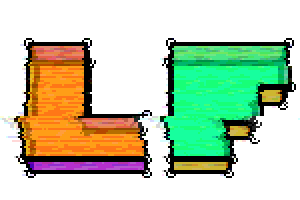

In [24]:
ditherbig = Image.new('RGB', (wi,hi))
for x in range(0, wi, wd):
    for y in range(0, hi, hd):
        ditherbig.paste(dither, (x, y))
for y in range(hi):
    for x in range(wi):
        pixel = ditherbig.getpixel((x,y))
        ditherbig.putpixel(
            (
                (x+y*fixedShift[y]*2)%wi,
                fixedShuffleOrder[y]%hi
            ),
            pixel
        )
    pixel = ditherbig.getpixel((x,y))
    ditherbig.putpixel(
        (
            x,
            (y+random.randrange(hd))%hi
        ),
        pixel
    )

fuzzmask = Image.new('L', (wi, hi), 255)
draw = ImageDraw.Draw(fuzzmask, 'L')
for y in range(hi):
    if fixedShift[y]==1:
        draw.line([(0, y), (wi, y)], fill = 'black', width = 0)
fuzzmask2 = Image.new('L', (wi, hi), 255)
draw = ImageDraw.Draw(fuzzmask2, 'L')
for y in range(hi):
    if fixedShift[y]==2:
        draw.line([(0, y), (wi, y)], fill = 'black', width = 0)

frames = []

filename = "out/lf-small.gif"

frameRange = (0,35)
duration = frameRange[1]-frameRange[0]
#linger = (0,0) # how long to linger on the first and last frame

for frame in range(0,duration):
    image = Image.new('RGB', (wi, hi), (255,255,255,0))
    draw = ImageDraw.Draw(image, 'RGBA')
    #eased = easeInOutQuad(frame, 0, math.pi, duration)
    eased = 0 #easeInOutQuad(frame, 0, 1, duration)
    perspective = Perspective(Point2d(wi/2,hi/2), 5000)
    #rotation = Rotation([1, 1, -0.005 * eased], 0.01 * eased);
    rotation = Rotation([0, 1, 0], eased*2*math.pi);
    scalefac = 0.4
    fixedRandoms[0] = (56+eased*(hi*4))%hi + random.randrange(5)
    drawObject(letterL + letterF, perspective, rotation, Point3d(150, 160, 0), Point3d(74, 76, 0), Point3d(1*scalefac, 1*scalefac, 0.5*scalefac))
    
    cleanimage = image.copy()
    
    image = postprocessing(image, cleanimage, ditherbig, fuzzmask, fuzzmask2)
    image = image.resize((wi*2,hi*2), Image.Resampling.NEAREST)
    frames.append(image)
    
    #if frame == 0:
    #    for n in range(linger[0]-1):
    #        image = postprocessing(image, cleanimage, ditherbig, fuzzmask, fuzzmask2)
    #        image = image.resize((wi*2,hi*2), Image.Resampling.NEAREST)
    #        frames.append(image)
    #elif frame == duration-1:
    #    for n in range(linger[1]-1):
    #        image = postprocessing(image, cleanimage, ditherbig, fuzzmask, fuzzmask2)
    #        image = image.resize((wi*2,hi*2), Image.Resampling.NEAREST)
    #        frames.append(image)
        
    clear_output(wait=True)
    print("Frame " + str(frame))
    display(image)
    #image.save('letter-cubes2' + str(frame) + '.png')

clear_output(wait=True)
frames[0].save(filename, format='GIF', append_images=frames[1:], save_all=True, duration=60, loop=0)
with open(filename,'rb') as file:
    display(IPImage(file.read()))